# Simple image processing on Raspberry Pi with Python / RaspberryPiでPythonを使った簡単な画像処理

## Taking a picture with a camera / カメラで写真を撮る

First, let`s check if camera is working correctly and take an picture / まず、カメラが正しく動作しているかどうかを確認し、写真を撮ってみましょう。

[6:30:59.536724167] [6695]  INFO Camera camera_manager.cpp:327 libcamera v0.4.0+51-ca36c77f
[6:30:59.598311742] [7215]  WARN RPiSdn sdn.cpp:40 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[6:30:59.601112793] [7215]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media1 and ISP device /dev/media2
[6:30:59.601180625] [7215]  INFO RPI pipeline_base.cpp:1121 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[6:30:59.612252255] [6695]  INFO Camera camera.cpp:1202 configuring streams: (0) 640x480-XBGR8888 (1) 640x480-SGBRG10_CSI2P
[6:30:59.612757118] [7215]  INFO RPI vc4.cpp:622 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA


Image saved to pictures/image.jpg


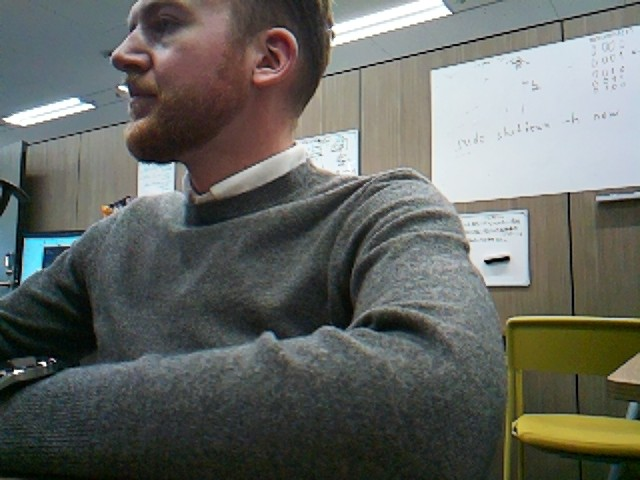

In [7]:
import time
from picamera2 import Picamera2, Preview  # Fixed import
from IPython.display import Image, display
import os

def initialize_camera():
    """
    Initialize the PiCamera instance.
    PiCamera インスタンスを初期化します。
    """
    picam2 = Picamera2()
    config = picam2.create_preview_configuration()
    picam2.configure(config)
    return picam2


def capture_image(camera, directory, filename):
    """
    Capture an image and save it to the specified directory with the given filename.
    画像を撮影し、指定されたディレクトリに指定されたファイル名で保存します。

    Parameters:
    camera (PiCamera): The initialized PiCamera object. 初期化された PiCamera オブジェクト。
    directory (str): The directory where the image will be saved. 画像を保存するディレクトリ。
    filename (str): The name of the file to save the image as. 画像を保存するファイル名。
    """
    if not os.path.exists(directory):
        os.makedirs(
            directory
        )  # Create the directory if it doesn't exist. ディレクトリが存在しない場合は作成します。

    filepath = os.path.join(directory, filename)
    camera.start_preview(
        Preview.NULL
    )  # Specify preview type. プレビュータイプを指定します。
    camera.start()  # Start the camera. カメラを起動します。
    time.sleep(
        2
    )  # Allow the camera to adjust to lighting conditions. カメラが照明条件に適応するために2秒待ちます。
    camera.capture_file(filepath)
    print(f"Image saved to {filepath}")  # 画像が保存されたことを通知します。
    display(Image(filename=filepath))


def run_picture_sequence():
    """
    Main function to initialize the camera and capture an image.
    カメラを初期化し、画像を撮影するメイン関数。
    """
    camera = initialize_camera()
    try:
        capture_image(camera, "pictures", "image.jpg")
    finally:
        camera.stop()  # Ensure the camera is properly closed. カメラが適切に閉じられるようにします。
        camera.stop_preview()  # Stop the preview. プレビューを停止します。
        camera.close()


run_picture_sequence()



In [ ]:
#